#Importing modules

In [1]:
pip install -U sklearn

  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\athis\AppData\Local\Temp\pip-install-yuomlf6e\sklearn_adbc10d8fbb542d08c08c491ab4d8359\setup.py", line 10, in <module>
      LONG_DESCRIPTION = f.read()
    File "C:\Users\athis\anaconda3\lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 7: character maps to <undefined>
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt
import sklearn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTETomek
import seaborn as sns
from collections import Counter
import warnings
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from numpy import arange
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

#Reading the data

In [3]:
warnings.filterwarnings('ignore')
url = r"C:\Users\athis\Desktop\csv.csv"
df = pd.read_csv(url)
df

Unnamed: 0         pid  age  gender  nhiss  mrs  systolic  distolic  \
0              1  PID2829938   61    Male      0   -1       124        80   
1              2  PID1833441   75    Male      0   -1       123        82   
2              3  PID8745027   73    Male      0   -1       121        83   
3              4  PID4568062   63  Female      0   -1       120        85   
4              5  PID3855176   23    Male      0   -1       126        81   
...          ...         ...  ...     ...    ...  ...       ...       ...   
4793        4794    PID11726   67    Male     13    6       180        83   
4794        4795    PID11727   67  Female     20    3       180        88   
4795        4796    PID11728   65    Male      6    4       126       111   
4796        4797    PID11729   64    Male     19    5       126        82   
4797        4798    PID11730   65    Male      5    1       169       115   

      glucose  paralysis  smoking  bmi  cholestrol  tos  risk  
0          77          0        0   22         200   -1     0  
1          79          0        0   20         208   -1     0  
2          83          0        0   20         208   -1     0  
3         105          0        0   20         210   -1     0  
4          89          0        0   22         201   -1     0  
...       ...        ...      ...  ...         ...  ...   ...  
4793      198          1        2   39         219    3     2  
4794      188          0        2   22         187    1     2  
4795      227          0        3   23         233    3     2  
4796      262          2        2   28         244    1     2  
4797      263          0        3   27         231    3     2  

[4798 rows x 15 columns]

# Dropping unnecessary columns

In [4]:
df = df.drop(["Unnamed: 0"], axis = 1)
df = df.drop(["pid"], axis = 1)
df = df.rename(columns={"nhiss":"NIHSS_Score", "mrs":"mRS", "distolic":"diastolic"})

# EDA

In [5]:
df

age  gender  NIHSS_Score  mRS  systolic  diastolic  glucose  paralysis  \
0      61    Male            0   -1       124         80       77          0   
1      75    Male            0   -1       123         82       79          0   
2      73    Male            0   -1       121         83       83          0   
3      63  Female            0   -1       120         85      105          0   
4      23    Male            0   -1       126         81       89          0   
...   ...     ...          ...  ...       ...        ...      ...        ...   
4793   67    Male           13    6       180         83      198          1   
4794   67  Female           20    3       180         88      188          0   
4795   65    Male            6    4       126        111      227          0   
4796   64    Male           19    5       126         82      262          2   
4797   65    Male            5    1       169        115      263          0   

      smoking  bmi  cholestrol  tos  risk  
0           0   22         200   -1     0  
1           0   20         208   -1     0  
2           0   20         208   -1     0  
3           0   20         210   -1     0  
4           0   22         201   -1     0  
...       ...  ...         ...  ...   ...  
4793        2   39         219    3     2  
4794        2   22         187    1     2  
4795        3   23         233    3     2  
4796        2   28         244    1     2  
4797        3   27         231    3     2  

[4798 rows x 13 columns]

In [6]:
#Printing the shape of the dataset
df.shape

(4798, 13)

In [7]:
#Describing the dataset
df.describe()

age  NIHSS_Score          mRS     systolic    diastolic  \
count  4798.000000  4798.000000  4798.000000  4798.000000  4798.000000   
mean     47.116090    18.124427     3.674239   153.091705   103.655065   
std      23.690637    11.274141     1.872073    24.927477    18.344127   
min       1.000000     0.000000    -1.000000   100.000000    59.000000   
25%      28.000000    10.000000     2.000000   132.000000    91.000000   
50%      49.000000    18.000000     4.000000   154.000000   104.000000   
75%      66.000000    25.000000     5.000000   175.000000   118.000000   
max      90.000000    45.000000     6.000000   195.000000   135.000000   

           glucose    paralysis      smoking          bmi   cholestrol  \
count  4798.000000  4798.000000  4798.000000  4798.000000  4798.000000   
mean    225.846186     1.362026     0.884744    33.739475   217.531055   
std      56.119071     1.106405     0.903432     6.231687    20.268753   
min      70.000000     0.000000     0.000000    18.000000   160.000000   
25%     203.000000     0.000000     0.000000    29.000000   205.000000   
50%     239.000000     1.000000     1.000000    34.000000   219.000000   
75%     268.000000     2.000000     2.000000    38.000000   234.000000   
max     295.000000     3.000000     3.000000    45.000000   253.000000   

               tos         risk  
count  4798.000000  4798.000000  
mean      1.988745     1.879325  
std       0.973207     0.486878  
min      -1.000000     0.000000  
25%       1.000000     2.000000  
50%       2.000000     2.000000  
75%       3.000000     2.000000  
max       3.000000     3.000000

In [8]:
#Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798 entries, 0 to 4797
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4798 non-null   int64 
 1   gender       4798 non-null   object
 2   NIHSS_Score  4798 non-null   int64 
 3   mRS          4798 non-null   int64 
 4   systolic     4798 non-null   int64 
 5   diastolic    4798 non-null   int64 
 6   glucose      4798 non-null   int64 
 7   paralysis    4798 non-null   int64 
 8   smoking      4798 non-null   int64 
 9   bmi          4798 non-null   int64 
 10  cholestrol   4798 non-null   int64 
 11  tos          4798 non-null   int64 
 12  risk         4798 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 487.4+ KB


<AxesSubplot:ylabel='risk'>

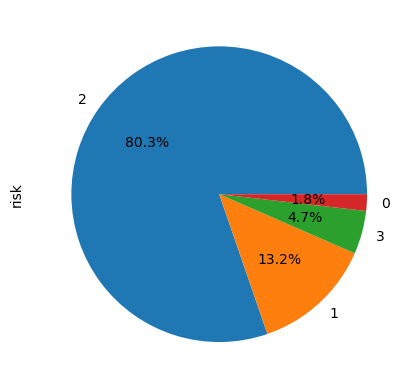

In [9]:
#Getting the ditribution of the target variable risk
df.risk.value_counts().plot(kind='pie',autopct='%1.1f%%')

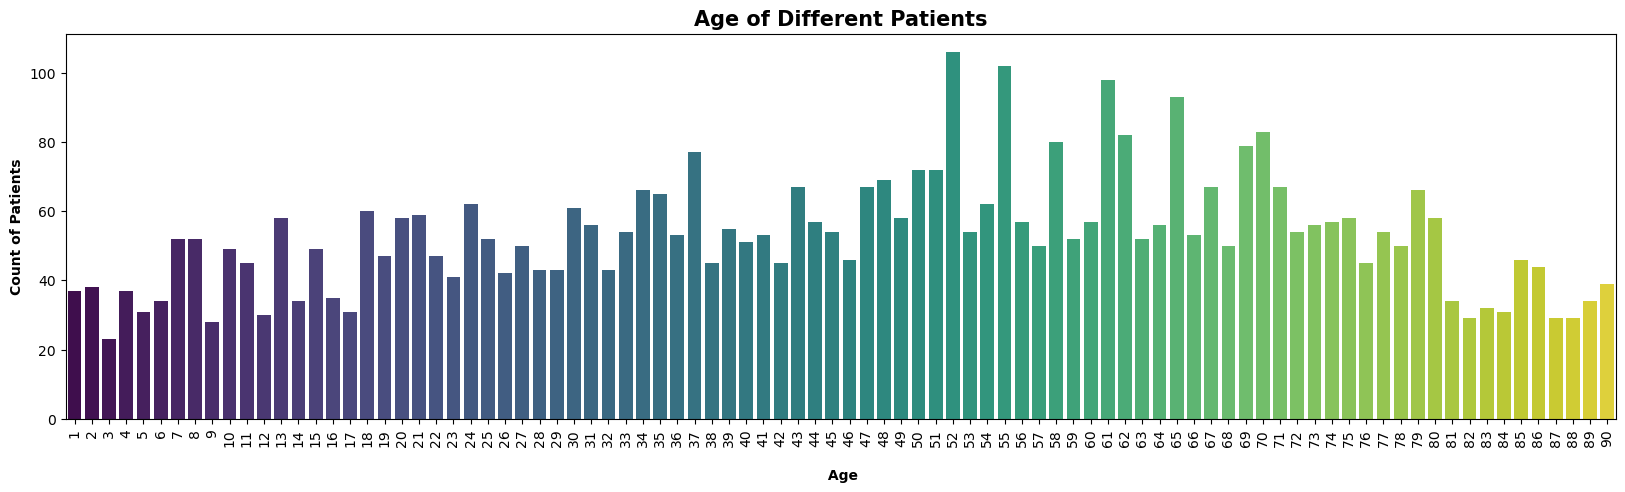

In [10]:
#Getting distribution on the basis of age
fig, ax=plt.subplots(figsize=(20,5))
sns.countplot(x=df.age, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('\n Age', fontsize=10, fontweight='bold')
plt.ylabel('Count of Patients', fontsize=10, fontweight='bold')
plt.title('Age of Different Patients', fontweight = 'bold', fontsize='15')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

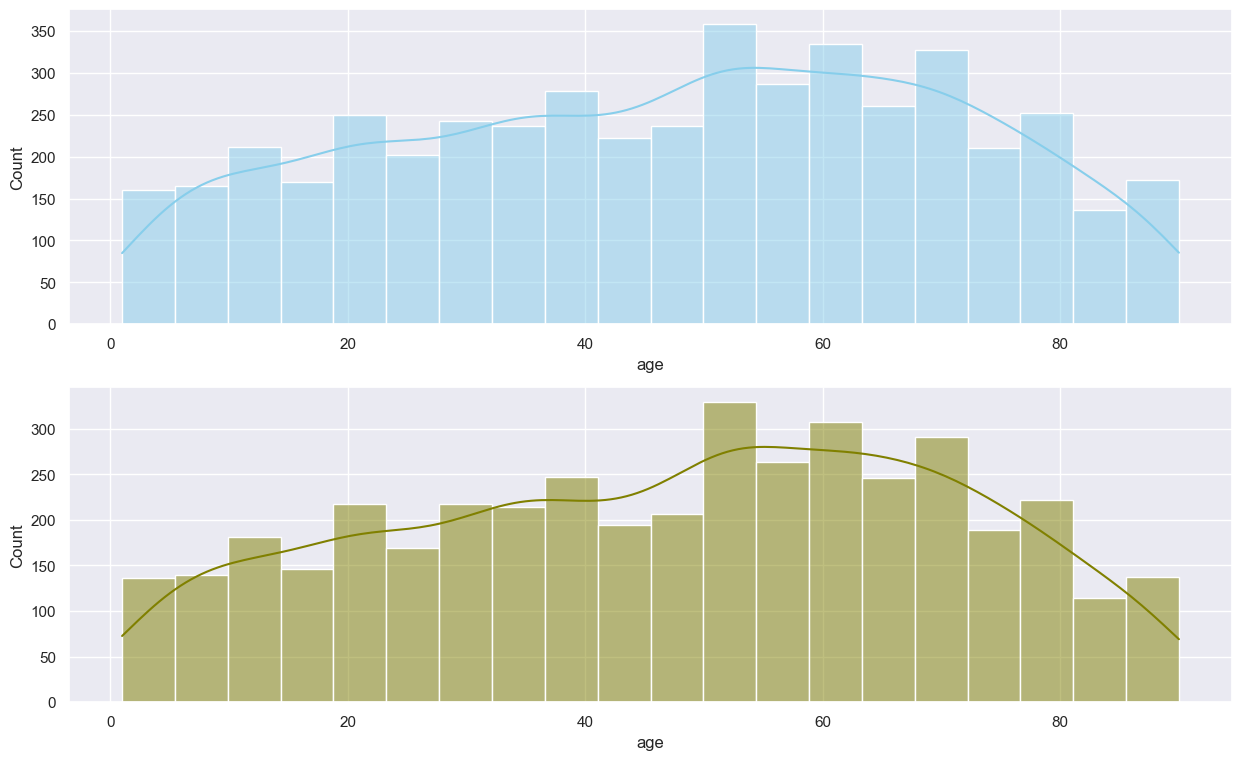

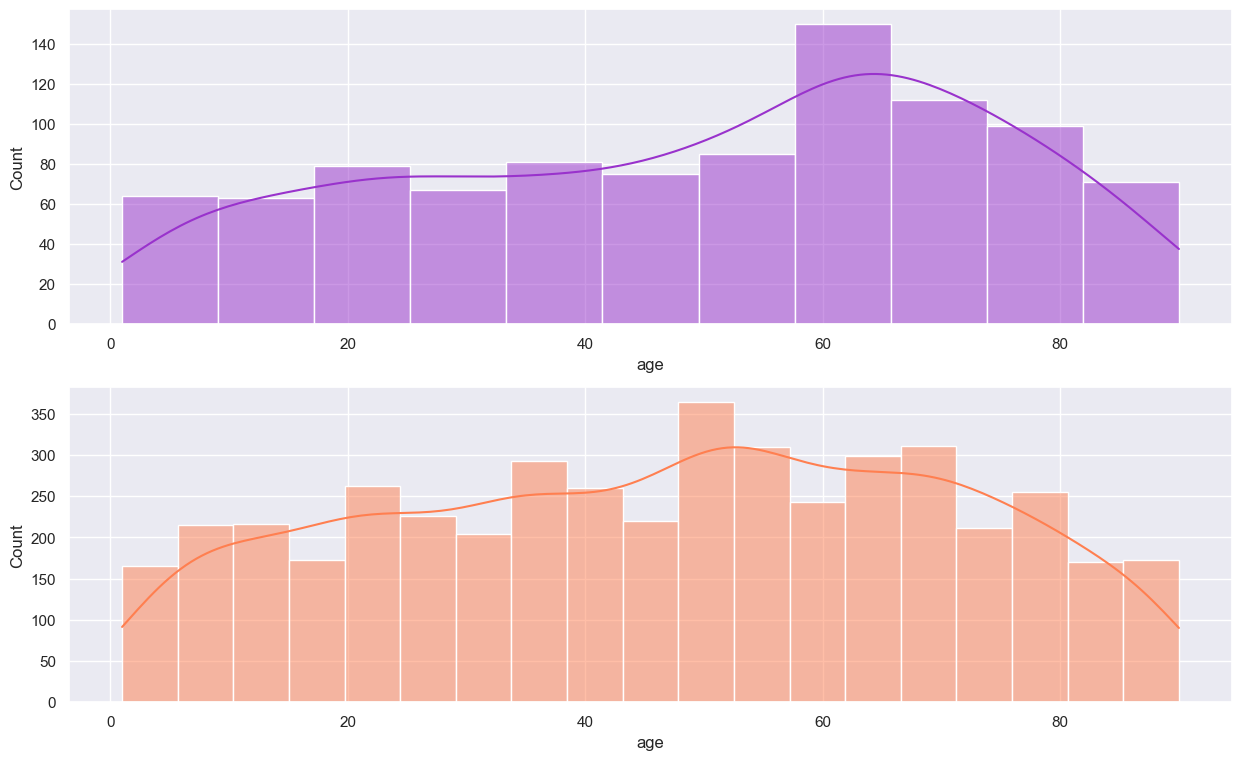

In [11]:
#Getting the ages where stroke severity is higher
stroke_0 = df[~(df['risk'] == 0)]
stroke_1 = df[~(df['risk'] == 1)]
stroke_2 = df[~(df['risk'] == 2)]
stroke_3 = df[~(df['risk'] == 3)]
sns.set(style="darkgrid")
fig3, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 9))
fig4, (ax3, ax4) = plt.subplots(2,1, figsize=(15, 9))

sns.histplot(x=stroke_0['age'], kde=True, color="skyblue", ax=ax1)
sns.histplot(x=stroke_1['age'], kde=True, color="olive", ax=ax2)
sns.histplot(x=stroke_2['age'], kde=True, color="darkorchid", ax=ax3)
sns.histplot(x=stroke_3['age'], kde=True, color="coral", ax=ax4)

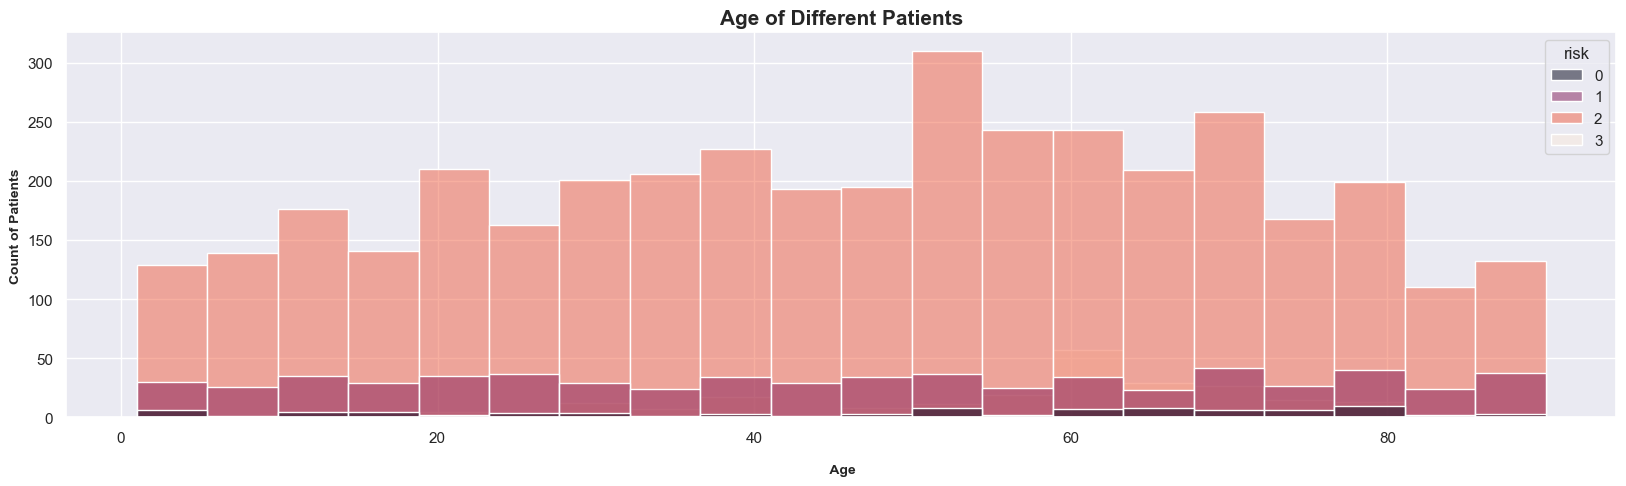

In [12]:
#Getting the severity of strokes age-wise
fig4, ax=plt.subplots(figsize=(20,5))
legend = ['No Stroke', 'Stroke']
sns.set(style="darkgrid")
sns.histplot(x=df['age'], hue=df.risk, palette='rocket')
plt.xlabel('\n Age', fontsize=10, fontweight='bold')
plt.ylabel('Count of Patients', fontsize=10, fontweight='bold')
plt.title('Age of Different Patients', fontweight = 'bold', fontsize='15')
plt.show()  

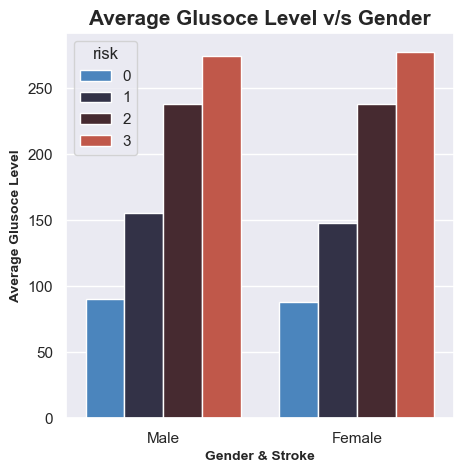

In [13]:
#Getting average glucose levels across genders
fig11, ax = plt.subplots(figsize=(5, 5))
sns.set(style="darkgrid")

sns.barplot(x=df.gender,y=df.glucose,hue=df.risk,estimator=np.average ,ci=None,palette='icefire')
plt.xlabel('Gender & Stroke',fontsize=10, fontweight='bold')
plt.ylabel('Average Glusoce Level',fontsize=10, fontweight='bold')
plt.title('Average Glusoce Level v/s Gender',fontsize=15, fontweight='bold')


plt.show()  

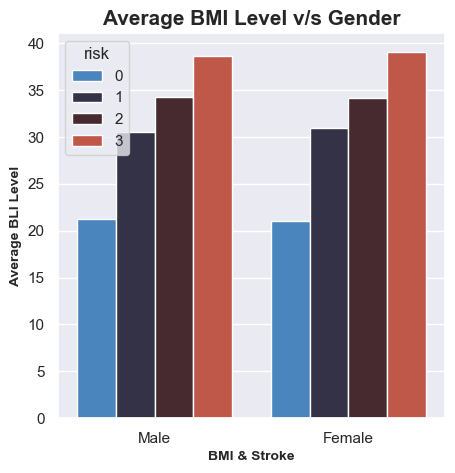

In [14]:
#Getting average BMI levels across genders
fig11, ax = plt.subplots(figsize=(5, 5))
sns.set(style="darkgrid")

sns.barplot(x=df.gender,y=df.bmi,hue=df.risk,estimator=np.average ,ci=None,palette='icefire')
plt.xlabel('BMI & Stroke',fontsize=10, fontweight='bold')
plt.ylabel('Average BLI Level',fontsize=10, fontweight='bold')
plt.title('Average BMI Level v/s Gender',fontsize=15, fontweight='bold')


plt.show()  

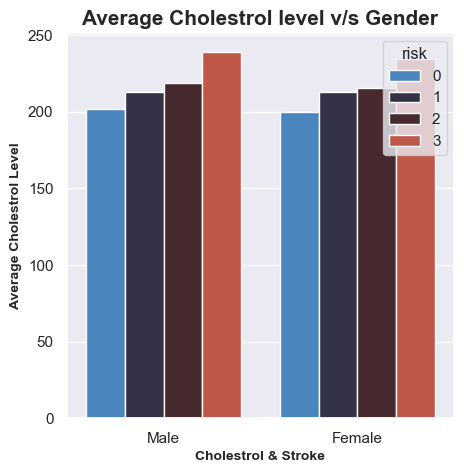

In [15]:
#Getting average Cholestrol levels across genders
fig11, ax = plt.subplots(figsize=(5, 5))
sns.set(style="darkgrid")

sns.barplot(x=df.gender,y=df.cholestrol,hue=df.risk,estimator=np.average ,ci=None,palette='icefire')
plt.xlabel('Cholestrol & Stroke',fontsize=10, fontweight='bold')
plt.ylabel('Average Cholestrol Level',fontsize=10, fontweight='bold')
plt.title('Average Cholestrol level v/s Gender',fontsize=15, fontweight='bold')


plt.show()  

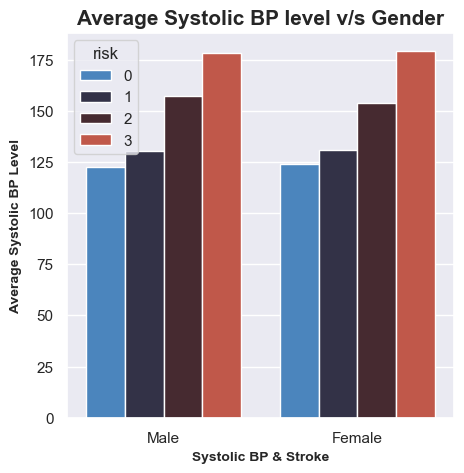

In [16]:
#Getting average Systolic blood pressure levels across genders
fig11, ax = plt.subplots(figsize=(5, 5))
sns.set(style="darkgrid")

sns.barplot(x=df.gender,y=df.systolic,hue=df.risk,estimator=np.average ,ci=None,palette='icefire')
plt.xlabel('Systolic BP & Stroke',fontsize=10, fontweight='bold')
plt.ylabel('Average Systolic BP Level',fontsize=10, fontweight='bold')
plt.title('Average Systolic BP level v/s Gender',fontsize=15, fontweight='bold')

plt.show()  

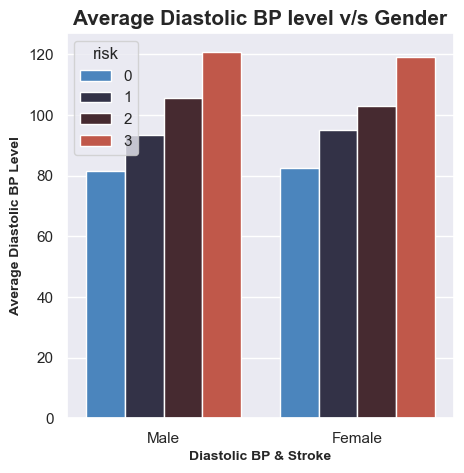

In [17]:
#Getting average Diastolic blood pressure levels across genders
fig11, ax = plt.subplots(figsize=(5, 5))
sns.set(style="darkgrid")

sns.barplot(x=df.gender,y=df.diastolic,hue=df.risk,estimator=np.average ,ci=None,palette='icefire')
plt.xlabel('Diastolic BP & Stroke',fontsize=10, fontweight='bold')
plt.ylabel('Average Diastolic BP Level',fontsize=10, fontweight='bold')
plt.title('Average Diastolic BP level v/s Gender',fontsize=15, fontweight='bold')

plt.show()  

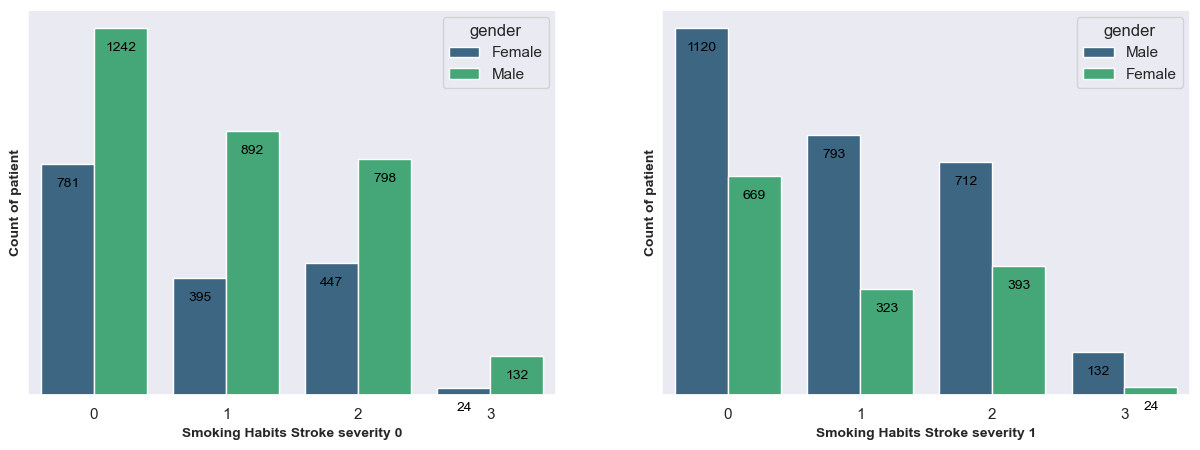

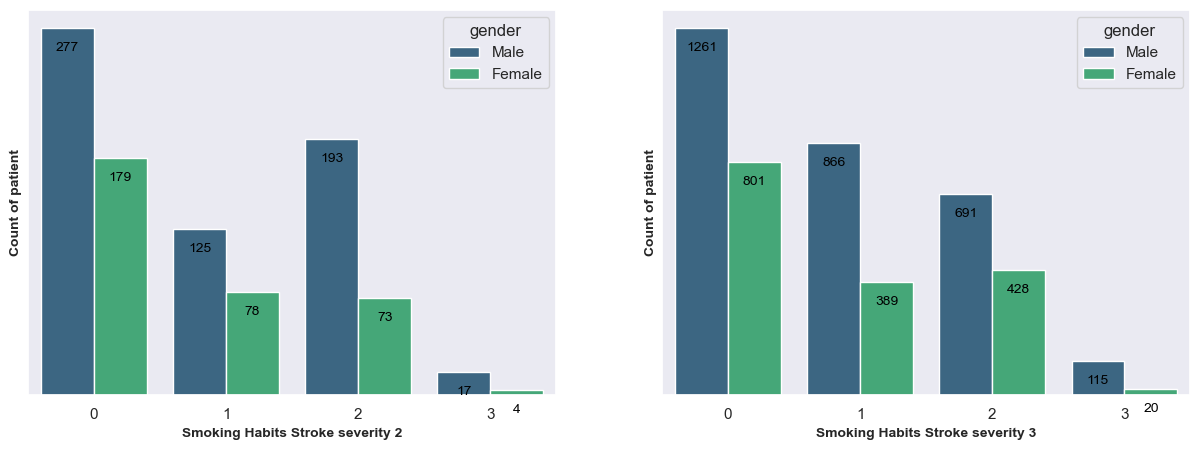

In [18]:
#Smoking habits of male and females vs stroke severity
fig13, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig14, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x=stroke_0.smoking,hue=stroke_0.gender, palette='viridis',ax=ax1)
ax1.set_xlabel('Smoking Habits Stroke severity 0',fontsize=10, fontweight='bold')
ax1.set_yticks([])
ax1.set_ylabel('Patients',fontsize=10, fontweight='bold')
ax1.set_ylabel('Count of patient')
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)


sns.countplot(x=stroke_1.smoking,hue=stroke_1.gender, palette='viridis',ax=ax2)
ax2.set_xlabel('Smoking Habits Stroke severity 1',fontsize=10, fontweight='bold')
ax2.set_yticks([])
ax2.set_ylabel('Patients',fontsize=10, fontweight='bold')
ax2.set_ylabel('Count of patient')
for p in ax2.patches:
    ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)

sns.countplot(x=stroke_2.smoking,hue=stroke_2.gender, palette='viridis',ax=ax3)
ax3.set_xlabel('Smoking Habits Stroke severity 2',fontsize=10, fontweight='bold')
ax3.set_yticks([])
ax3.set_ylabel('Patients',fontsize=10, fontweight='bold')
ax3.set_ylabel('Count of patient')
for p in ax3.patches:
    ax3.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)


sns.countplot(x=stroke_3.smoking,hue=stroke_3.gender, palette='viridis',ax=ax4)
ax4.set_xlabel('Smoking Habits Stroke severity 3',fontsize=10, fontweight='bold')
ax4.set_yticks([])
ax4.set_ylabel('Patients',fontsize=10, fontweight='bold')
ax4.set_ylabel('Count of patient')
for p in ax4.patches:
    ax4.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)




<AxesSubplot:>

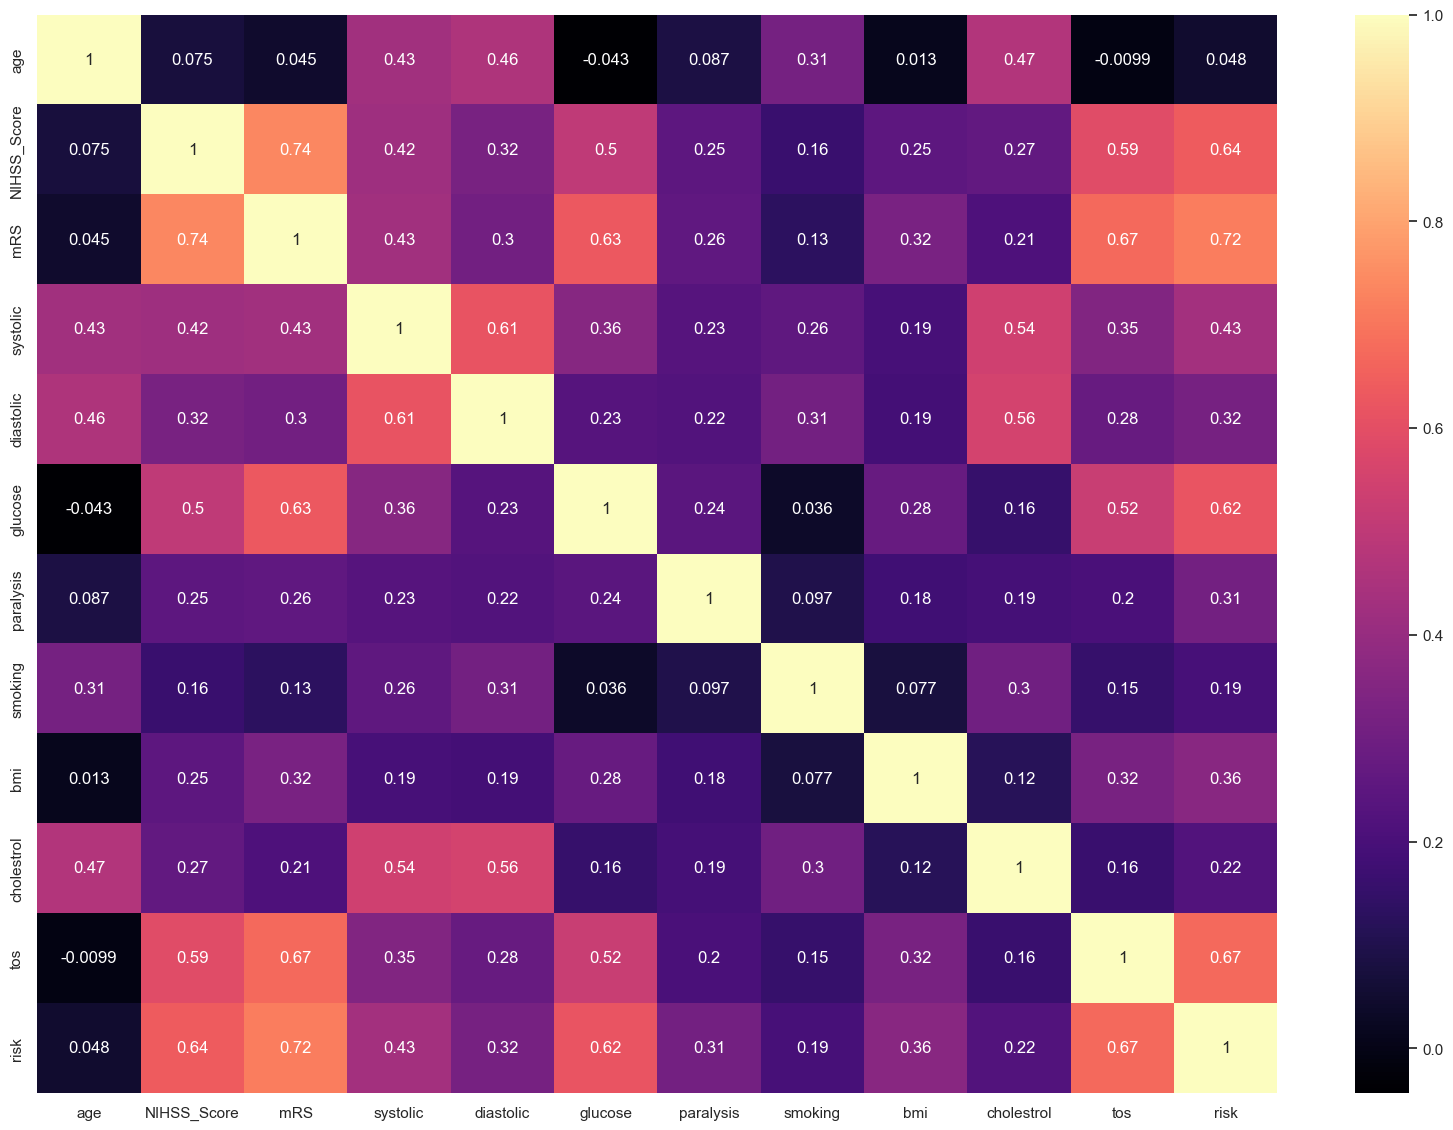

In [19]:
#Getting correlation of variables
import matplotlib.pyplot as plt
fig15,ax1 = plt.subplots(figsize=(20,14))
sns.heatmap(df.corr(), annot = True, cmap='magma',ax=ax1)

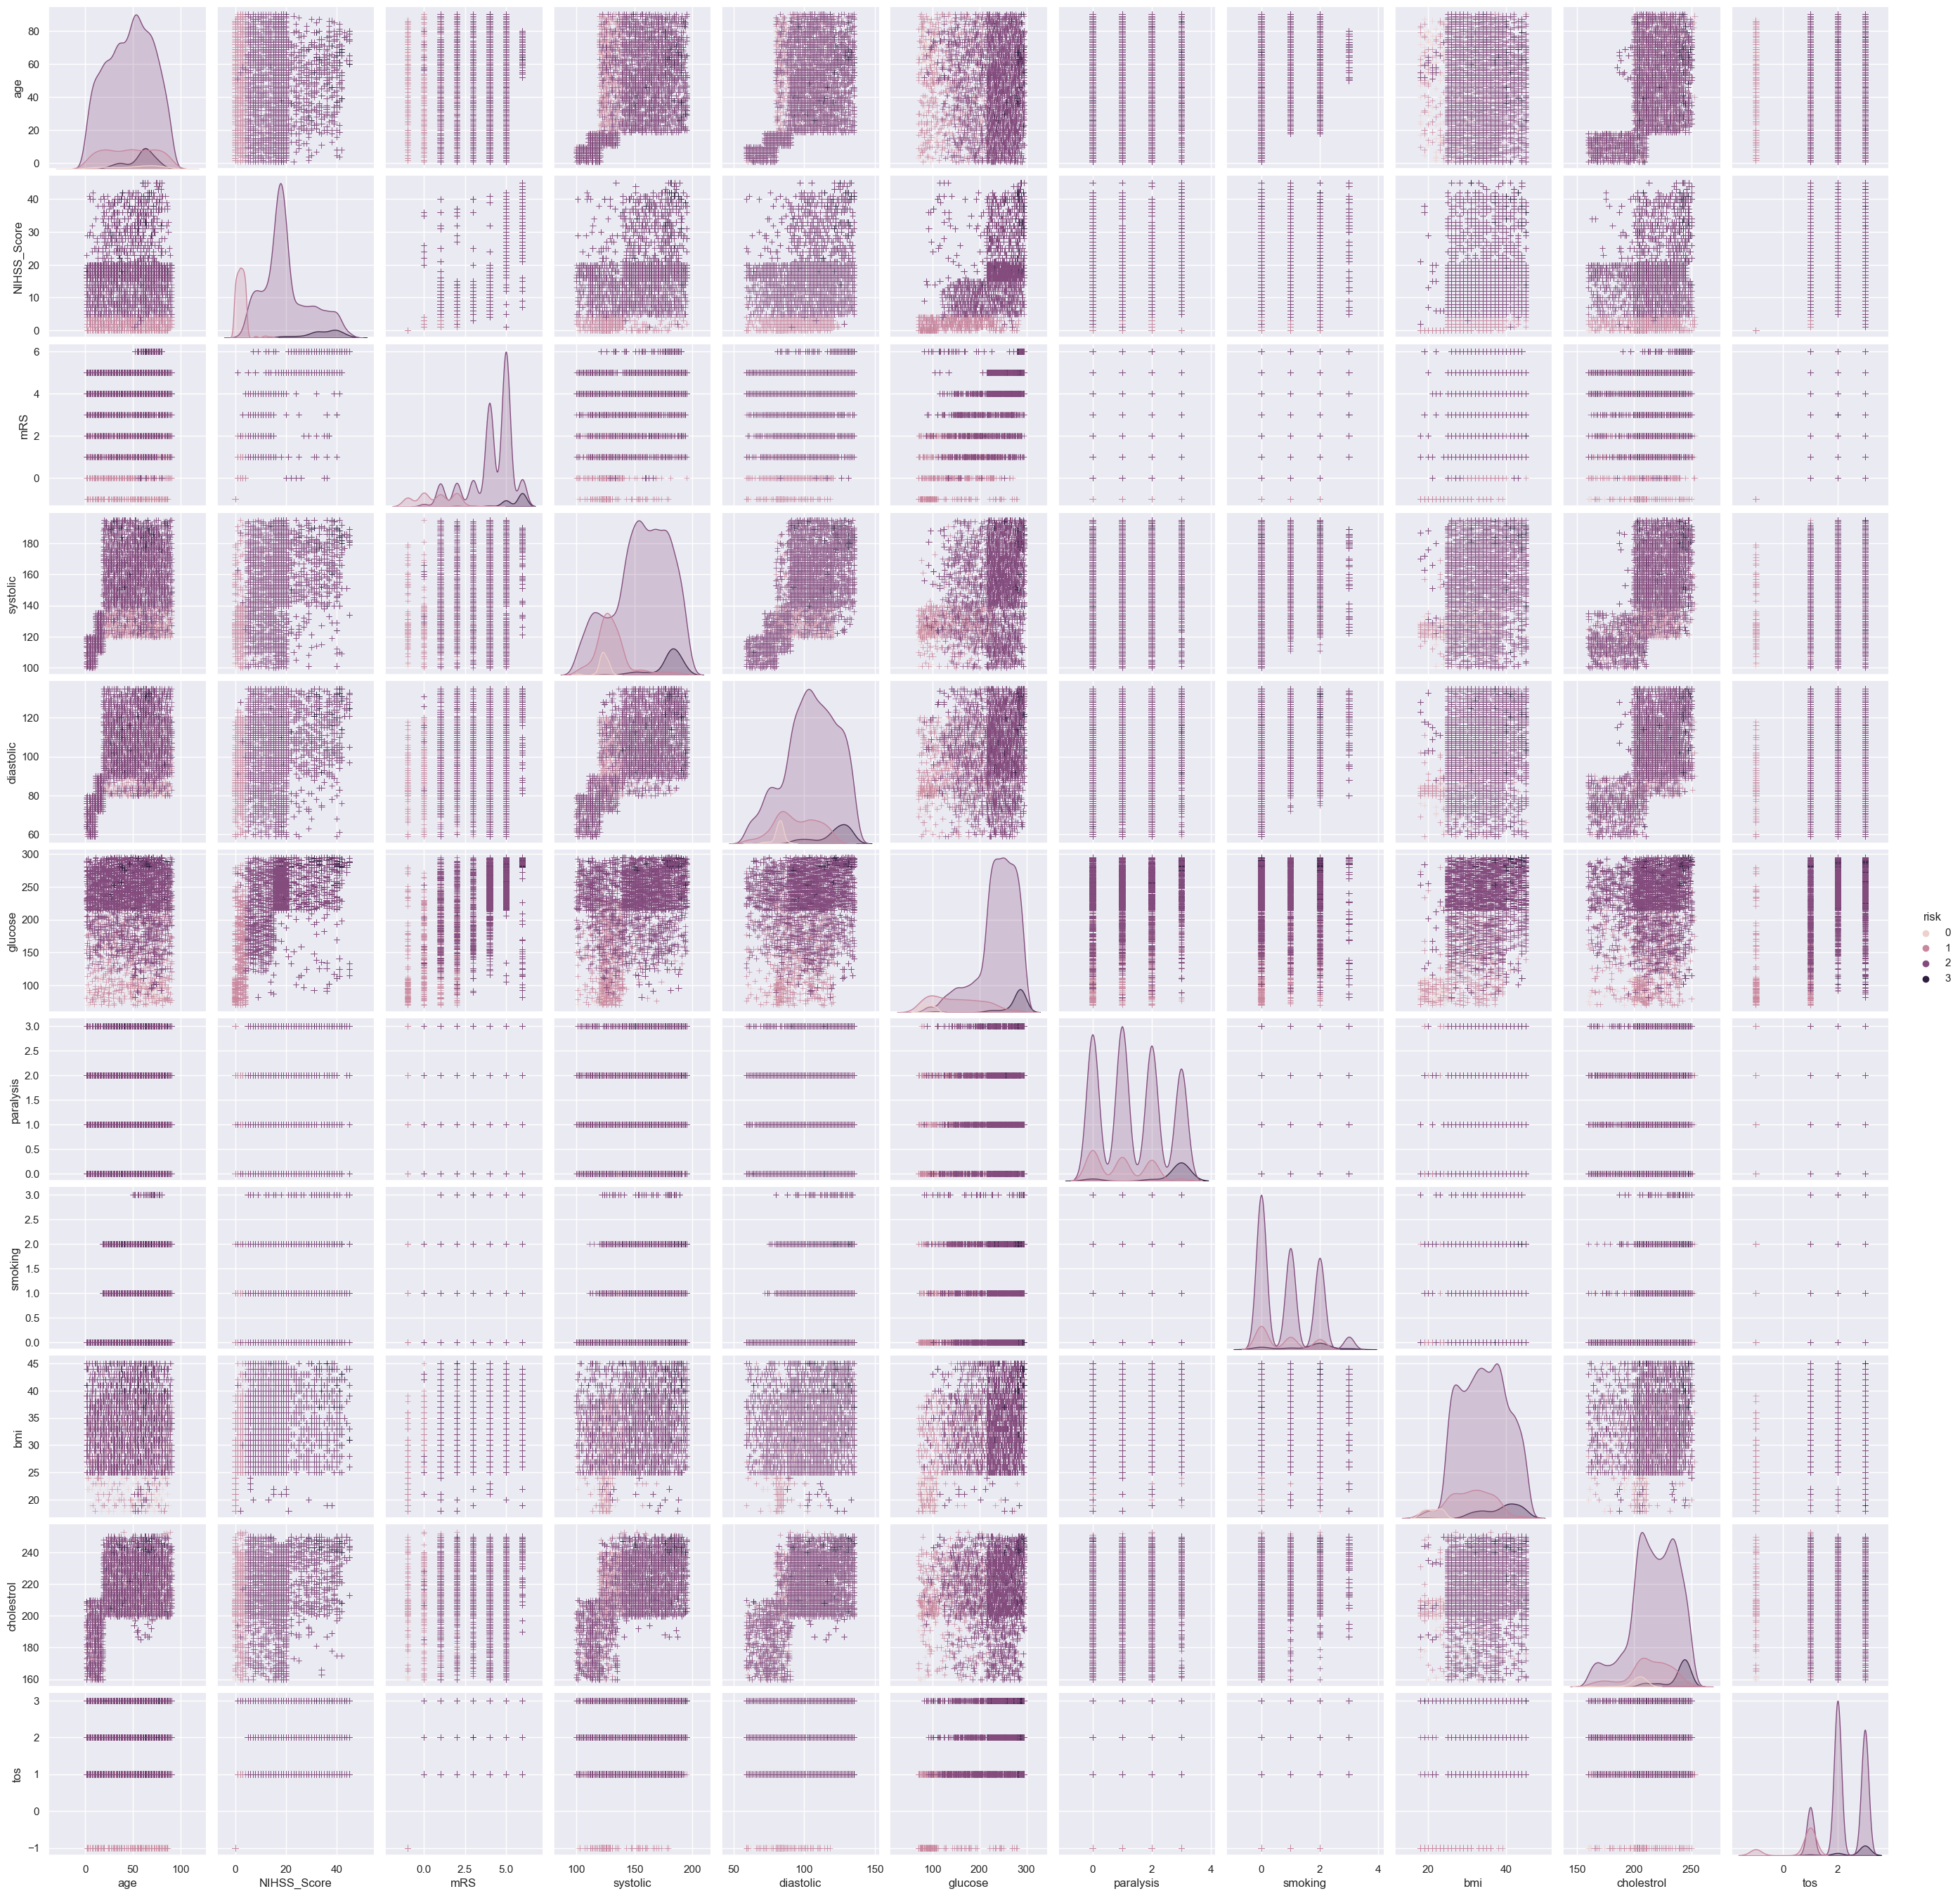

In [20]:

#Pair plots visualization

g = sns.pairplot(df, hue='risk', markers='+')

plt.show()

# Preprocessing

One Hot Encoding 'gender' into Male and Female and dropping 'gender' column

In [21]:
m = {"Male": 1, "Female": 0}
f = {"Male": 0, "Female": 1}
df.insert(1, "Female", df['gender'].map(f), True)
df.insert(1, "Male", df['gender'].map(m), True)
# dropping gender column
df.drop(['gender'], axis=1, inplace=True)
print(df)

      age  Male  Female  NIHSS_Score  mRS  systolic  diastolic  glucose  \
0      61     1       0            0   -1       124         80       77   
1      75     1       0            0   -1       123         82       79   
2      73     1       0            0   -1       121         83       83   
3      63     0       1            0   -1       120         85      105   
4      23     1       0            0   -1       126         81       89   
...   ...   ...     ...          ...  ...       ...        ...      ...   
4793   67     1       0           13    6       180         83      198   
4794   67     0       1           20    3       180         88      188   
4795   65     1       0            6    4       126        111      227   
4796   64     1       0           19    5       126         82      262   
4797   65     1       0            5    1       169        115      263   

      paralysis  smoking  bmi  cholestrol  tos  risk  
0             0        0   22         200   

In [22]:
zero = df[df['risk']==0]
one = df[df['risk']==1]
two = df[df['risk']==2]
three = df[df['risk']==3]
print("Risk 0:", zero.shape[0])
print("Risk 1:", one.shape[0])
print("Risk 2:", two.shape[0])
print("Risk 3:", three.shape[0])

y = df.values[:, -1].reshape(df.values.shape[0], 1)
X = df.values[:, :-1]

Risk 0: 87
Risk 1: 632
Risk 2: 3852
Risk 3: 227


# MinMax Scaling

In [23]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0.6741573  1.         0.         ... 0.14814815 0.43010753 0.        ]
 [0.83146067 1.         0.         ... 0.07407407 0.51612903 0.        ]
 [0.80898876 1.         0.         ... 0.07407407 0.51612903 0.        ]
 ...
 [0.71910112 1.         0.         ... 0.18518519 0.78494624 1.        ]
 [0.70786517 1.         0.         ... 0.37037037 0.90322581 0.5       ]
 [0.71910112 1.         0.         ... 0.33333333 0.76344086 1.        ]]


##OverSampling

In [24]:
smk = SMOTETomek(random_state=42)
X, y = smk.fit_resample(X, y)
print(X)
print("After Oversampling:")
print("Risk", Counter(y))

[[0.6741573  1.         0.         ... 0.14814815 0.43010753 0.        ]
 [0.83146067 1.         0.         ... 0.07407407 0.51612903 0.        ]
 [0.80898876 1.         0.         ... 0.07407407 0.51612903 0.        ]
 ...
 [0.57303371 1.         0.         ... 0.91952751 0.61886899 1.        ]
 [0.69662921 0.         1.         ... 0.96296296 0.88172043 1.        ]
 [0.7752809  1.         0.         ... 0.74074074 0.91397849 1.        ]]
After Oversampling:
Risk Counter({0: 3851, 3: 3851, 1: 3850, 2: 3850})


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Naive Bayes (Complement)

In [26]:
def nb_test(model,x_train,y_train):
  
  print("\n parameters: ")
  #it gives us the default parameters since those are the ones used 
  print( model.get_params(deep=True))
  print("\n log-probability estimates: ")
  print(model.predict_log_proba(x_train))
  print("\n probability estimates: ")
  print(model.predict_proba(x_train))



 parameters: 
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'norm': False}

 log-probability estimates: 
[[-1.11419184 -1.3373188  -1.54527743 -1.6295476 ]
 [-1.63906474 -1.70876694 -1.36125862 -0.9985546 ]
 [-1.07369715 -1.19052378 -1.55825084 -1.94008748]
 ...
 [-1.46243167 -1.42410218 -1.39387564 -1.27478369]
 [-1.27682992 -1.23344389 -1.44784025 -1.63621953]
 [-1.63770512 -1.69778128 -1.29782469 -1.05165321]]

 probability estimates: 
[[0.3281804  0.26254867 0.2132527  0.19601823]
 [0.19416155 0.18108895 0.25633794 0.36841156]
 [0.34174271 0.30406196 0.21050395 0.14369138]
 ...
 [0.23167224 0.24072449 0.24811185 0.27949142]
 [0.2789201  0.29128769 0.23507745 0.19471477]
 [0.19442571 0.1830893  0.27312528 0.34935971]]

 accuracy:  0.6358325219084713

 Confusion Matrix: 
[[784  11   0   0]
 [394 276  12 111]
 [ 20  51 126 519]
 [  0   0   4 773]]
              precision    recall  f1-score   support

           0       0.65      0.99      0.79       7

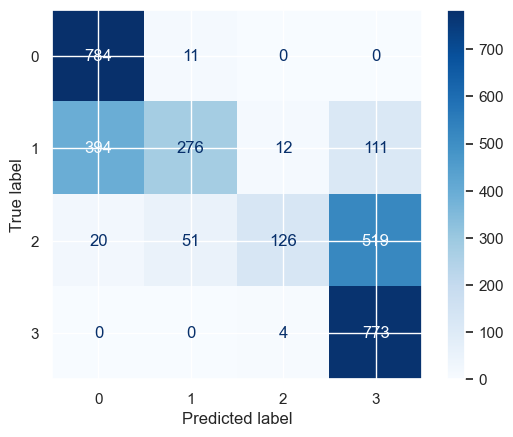

In [27]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import cohen_kappa_score
#Complement Naive Bayes classifier: particularly suited for imbalanced data sets
#designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier
#In complement Naive Bayes, instead of calculating the probability of an item belonging to a certain class,
#we calculate the probability of the item belonging to all the classes.
Cmodel = ComplementNB()
Cmodel.fit(x_train,y_train.ravel())
train_pred_c=Cmodel.predict(x_train)
test_pred_c=Cmodel.predict(x_test)
import warnings
warnings.filterwarnings('error')  # ignoring warning or not showing them more than once
warnings.filterwarnings('ignore')
nb_test(Cmodel,x_train,y_train)

print("\n accuracy: ",accuracy_score(y_test, test_pred_c))
cm=confusion_matrix(y_test,test_pred_c)
print("\n Confusion Matrix: ")
print(cm)
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(Cmodel,x_test,y_test,cmap=plt.cm.Blues)
print(classification_report(y_test, test_pred_c))
#print("Cohen Kappa Score",cohen_kappa_score(y_test, test_pred_c))



#Logistic Regression


In [28]:
param_grid = {'cv':[3, 5, 8, 10, 12],
              'max_iter': [1, 2, 5, 10, 20]}

GS_LR = GridSearchCV(LogisticRegressionCV(), param_grid)
GS_LR.fit(x_train, y_train.ravel())
print(GS_LR.best_params_)
print(GS_LR.score(x_test,y_test))

{'cv': 10, 'max_iter': 10}
0.9315157416423239


Confusion Matrix:
 [[795   0   0   0]
 [ 83 699  11   0]
 [  0  17 626  73]
 [  0   0  29 748]]
Accuracy: 93.08666017526777
Precision: 0.933186984354093
Recall: 0.9296103595375507
F1 Score: 0.9297333795191933
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       795
           1       0.98      0.88      0.93       793
           2       0.94      0.87      0.91       716
           3       0.91      0.96      0.94       777

    accuracy                           0.93      3081
   macro avg       0.93      0.93      0.93      3081
weighted avg       0.93      0.93      0.93      3081



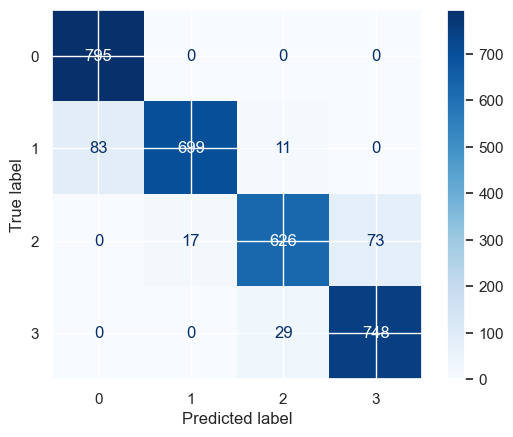

In [30]:
classifier = LogisticRegressionCV(cv=5, random_state = 0, max_iter=1000)
classifier.fit(x_train, y_train.ravel())
y_pred = classifier.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(classifier,x_test,y_test,cmap=plt.cm.Blues)

##Multilayer Perceptron (MLP)

In [33]:
param_grid = {'activation':['relu', 'identity', 'logistic', 'tanh'],
              'max_iter': [5, 10, 15, 20],
              'alpha':[0.1, 0.5, 0.05, 0.01, 0.008],
              'learning_rate_init':[0.1, 0.5, 0.05, 0.01, 0.008]}

GS_MLP = GridSearchCV(MLPClassifier(), param_grid)
GS_MLP.fit(x_train, y_train.ravel())
print(GS_MLP.best_params_)
print(GS_MLP.score(x_test,y_test))

{'activation': 'relu', 'alpha': 0.01, 'learning_rate_init': 0.008, 'max_iter': 20}
0.9386562804284323


Confusion Matrix:
 [[790   5   0   0]
 [ 74 709  10   0]
 [  0   6 700  10]
 [  0   0  35 742]]
Accuracy: 95.45602077247646
Precision: 0.9563433792924725
Recall: 0.9550981045096374
F1 Score: 0.9546021416537755
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       795
           1       0.98      0.89      0.94       793
           2       0.94      0.98      0.96       716
           3       0.99      0.95      0.97       777

    accuracy                           0.95      3081
   macro avg       0.96      0.96      0.95      3081
weighted avg       0.96      0.95      0.95      3081



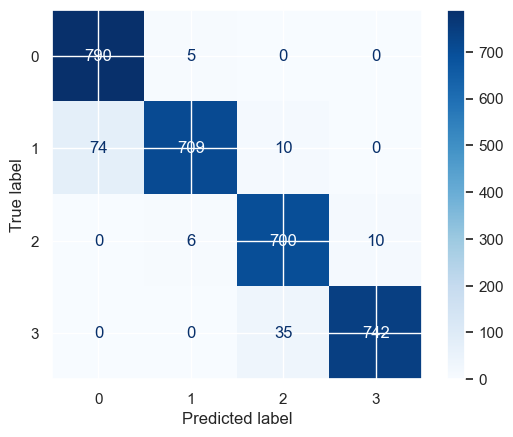

In [36]:
mlp_clf = MLPClassifier(activation='relu', alpha=0.008, learning_rate_init=0.01, max_iter=100)
mlp_clf.fit(x_train, y_train.ravel())
y_pred = mlp_clf.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(mlp_clf,x_test,y_test,cmap=plt.cm.Blues)

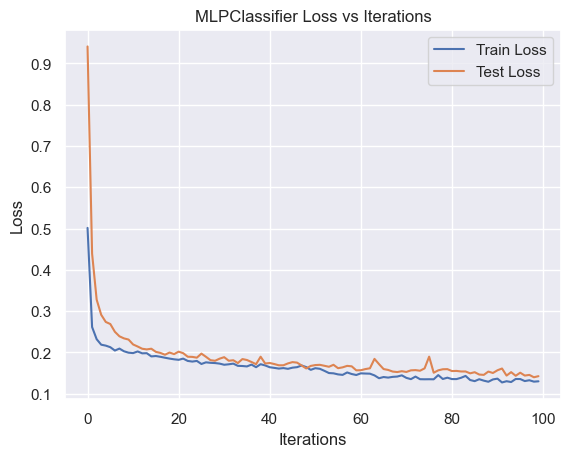

In [37]:
plt.plot(mlp_clf.loss_curve_, label="Train Loss")
mlp_clf.fit(x_test, y_test.ravel())
plt.plot(mlp_clf.loss_curve_, label="Test Loss")
plt.title("MLPClassifier Loss vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

[]

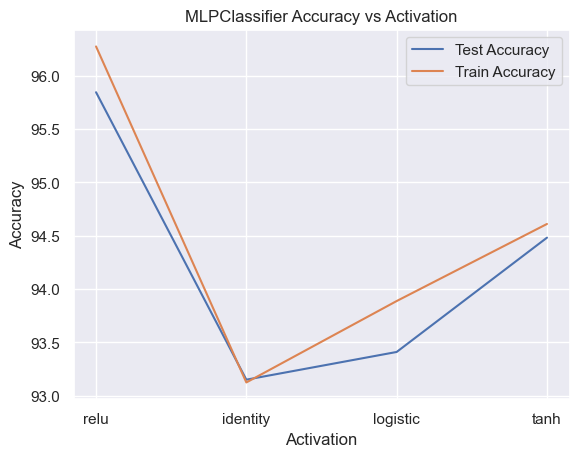

In [38]:
activation = ['relu', 'identity', 'logistic', 'tanh']
acti_acc = {}
acti_acc_train = {}
for a in activation:
    mlp_clf = MLPClassifier(activation=a, alpha=0.008, learning_rate_init=0.01, max_iter=100)
    mlp_clf.fit(x_train, y_train.ravel())
    y_pred = mlp_clf.predict(x_test)
    acti_acc[a] = accuracy_score(y_test, y_pred)*100
    y_pred_train = mlp_clf.predict(x_train)
    acti_acc_train[a] = accuracy_score(y_train.ravel(), y_pred_train)*100

plt.title("MLPClassifier Accuracy vs Activation")
plt.xlabel("Activation")
plt.ylabel("Accuracy")
plt.plot(list(acti_acc.keys()), list(acti_acc.values()), label="Test Accuracy")
plt.plot(list(acti_acc_train.keys()), list(acti_acc_train.values()), label="Train Accuracy")
plt.legend()
plt.plot()

[]

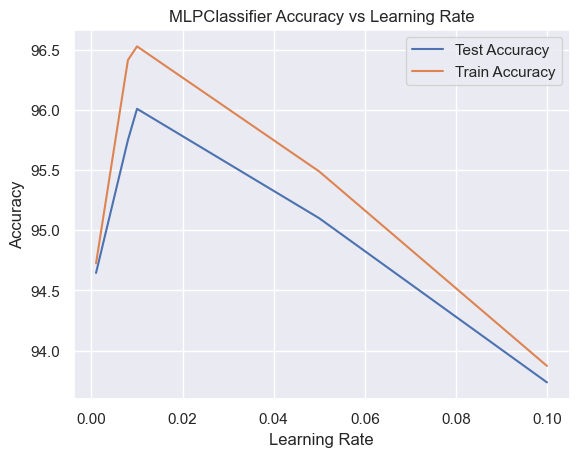

In [39]:
learning_rates = [0.001, 0.008, 0.01, 0.05, 0.1]
acti_acc = {}
acti_acc_train = {}
for lr in learning_rates:
    mlp_clf = MLPClassifier(activation='relu', alpha=0.008, learning_rate_init=lr, max_iter=100)
    mlp_clf.fit(x_train, y_train.ravel())
    y_pred = mlp_clf.predict(x_test)
    acti_acc[lr] = accuracy_score(y_test, y_pred)*100
    y_pred_train = mlp_clf.predict(x_train)
    acti_acc_train[lr] = accuracy_score(y_train.ravel(), y_pred_train)*100

plt.title("MLPClassifier Accuracy vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.plot(list(acti_acc.keys()), list(acti_acc.values()), label="Test Accuracy")
plt.plot(list(acti_acc_train.keys()), list(acti_acc_train.values()), label="Train Accuracy")
plt.legend()
plt.plot()



```
# This is formatted as code
```

# Random Forest

##Understanding the importance of different features



In [40]:
# seeing the feature importance variable
model = RandomForestClassifier(n_estimators = 100)
feature_names=df.columns[:-1]
# Train the model using the training sets
model.fit(x_train, y_train)
feature_imp = pd.Series(model.feature_importances_,index=feature_names ).sort_values(ascending = False)
feature_imp

NIHSS_Score    0.257816
mRS            0.141495
bmi            0.110151
tos            0.108664
glucose        0.096709
systolic       0.080819
paralysis      0.063054
cholestrol     0.046026
diastolic      0.045338
age            0.024483
smoking        0.021788
Male           0.001835
Female         0.001822
dtype: float64

##Training the model

###Finding best parameters using GridSearchCV

In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'criterion':['gini','entropy'],
              'random_state':[23],
              'bootstrap': [True, False],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None]}

GS_RF=GridSearchCV(RandomForestClassifier(), param_grid)
GS_RF.fit(x_train,y_train.ravel())
print(GS_RF.best_params_)
print(GS_RF.score(x_test,y_test))

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'random_state': 23}
0.9847452125933138


accuracy 0.9818240830899059
Confusion matrix
[[795   0   0   0]
 [ 37 752   4   0]
 [  0   0 707   9]
 [  0   0   6 771]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       795
           1       1.00      0.95      0.97       793
           2       0.99      0.99      0.99       716
           3       0.99      0.99      0.99       777

    accuracy                           0.98      3081
   macro avg       0.98      0.98      0.98      3081
weighted avg       0.98      0.98      0.98      3081

score 0.9818240830899059
precision 0.9825108458051711
recall 0.9820014409777666
F! Score 0.9819571832091596


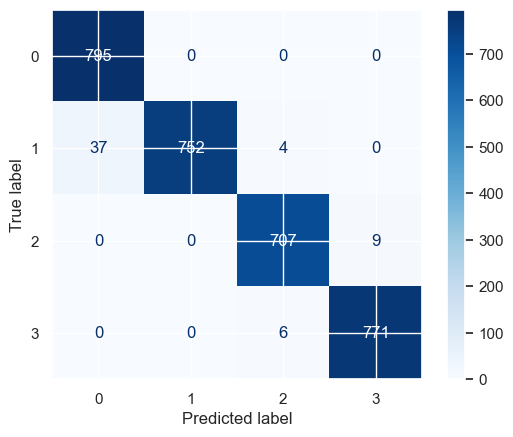

In [42]:
def performance(y_test,y_pred):
  print("accuracy",accuracy_score(y_test, y_pred))
  cm=confusion_matrix(y_test,y_pred)
  print("Confusion matrix")
  print(cm)
  print(classification_report(y_test, y_pred))
  report = classification_report(y_test, y_pred,output_dict=True )
  return report

model=RandomForestClassifier(bootstrap=True, criterion= 'entropy', max_depth= 20, random_state= 23)
model.fit(x_train, y_train.ravel())
yhat = model.predict(x_test)
report=performance(y_test,yhat)
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(model,x_test,y_test,cmap=plt.cm.Blues)
print("score",model.score(x_test,y_test))
print("precision",sklearn.metrics.precision_score(y_test,yhat,average="macro"))
print("recall",sklearn.metrics.recall_score(y_test,yhat,average="macro"))
print("F! Score",sklearn.metrics.f1_score(y_test,yhat,average="macro"))


[]

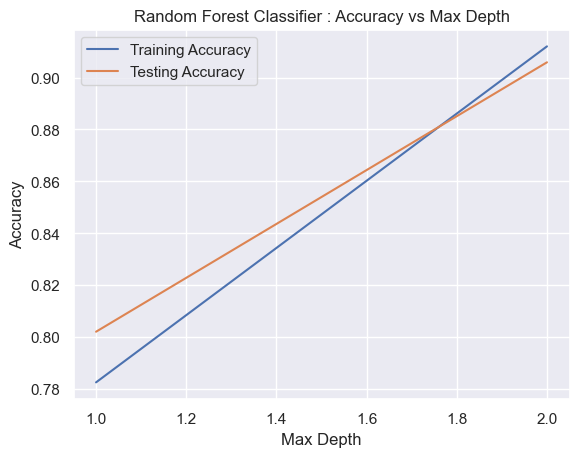

In [44]:
rf_train_score=[]
rf_test_score=[]
for i in np.arange(1, 3):
  param_grid = {'criterion':['gini','entropy'],'max_depth': [i],'random_state':[2]}
  GS_RF=GridSearchCV(RandomForestClassifier(), param_grid,cv=5)
  GS_RF.fit(x_train,y_train.ravel())
  y_train_pred=GS_RF.predict(x_train)
  rf_train_score.append(accuracy_score(y_train,y_train_pred))
  y_pred=GS_RF.predict(x_test)
  rf_test_score.append(accuracy_score(y_test,y_pred))
 
plt.title("Random Forest Classifier : Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1,3),rf_train_score,label="Training Accuracy")
plt.plot(np.arange(1,3),rf_test_score,label="Testing Accuracy")
plt.legend()
plt.plot()


#Adaboost Classifier

In [47]:
param_grid = {'learning_rate': [0.0001,0.001,0.01,0.1,0.3,0.5,0.7,0.9,1],
              'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

GS_RF=GridSearchCV(AdaBoostClassifier(), param_grid)
GS_RF.fit(x_train,y_train.ravel())
print(GS_RF.best_params_)
print(GS_RF.score(x_test,y_test))

{'learning_rate': 1, 'n_estimators': 9}
0.8542680947744239


accuracy 0.6358325219084713
Confusion matrix
[[  0 795   0   0]
 [  0 772  21   0]
 [  0   0 646  70]
 [  0   0 236 541]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       795
           1       0.49      0.97      0.65       793
           2       0.72      0.90      0.80       716
           3       0.89      0.70      0.78       777

    accuracy                           0.64      3081
   macro avg       0.52      0.64      0.56      3081
weighted avg       0.52      0.64      0.55      3081

score 0.6358325219084713
precision 0.5233719962868151
recall 0.6430051545332248
F1 Score 0.5579499160783239


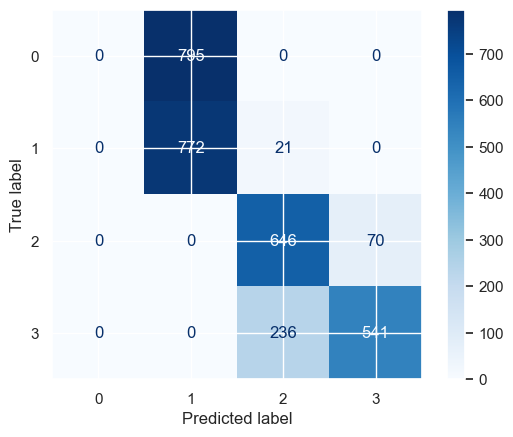

In [48]:
def performance(y_test,y_pred):
  print("accuracy",accuracy_score(y_test, y_pred))
  cm=confusion_matrix(y_test,y_pred)
  print("Confusion matrix")
  print(cm)
  print(classification_report(y_test, y_pred))
  report = classification_report(y_test, y_pred,output_dict=True )
  return report

model=AdaBoostClassifier(learning_rate=0.9,n_estimators=10)
model.fit(x_train, y_train.ravel())
yhat = model.predict(x_test)
report=performance(y_test,yhat)
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(model,x_test,y_test,cmap=plt.cm.Blues)
print("score",model.score(x_test,y_test))
print("precision",sklearn.metrics.precision_score(y_test,yhat,average="macro"))
print("recall",sklearn.metrics.recall_score(y_test,yhat,average="macro"))
print("F1 Score",sklearn.metrics.f1_score(y_test,yhat,average="macro"))

import pickle
file1 = open("Adaboost", "wb")
pickle.dump(model, file1) #Model trained on grid search parameters
file1.close()

#Naive Bayes (Gaussian)


In [51]:
def nb_test(model,x_train,y_train):
  
  print("\n parameters: ")
  #it gives us the default parameters since those are the ones used 
  print( model.get_params(deep=True))
  print("\n log-probability estimates: ")# Finding the log Probablity Estimates
  print(model.predict_log_proba(x_train))
  print("\n probability estimates: ") #Finding the probablity Estimates
  print(model.predict_proba(x_train))



 parameters: 
{'priors': None, 'var_smoothing': 1e-09}

 log-probability estimates: 
[[ 0.00000000e+00 -6.01402539e+01 -8.79808478e+01 -1.93702697e+02]
 [-5.52493729e+09 -2.47653910e+02 -1.51834831e+00 -2.47274155e-01]
 [ 0.00000000e+00 -6.04372021e+01 -8.90075762e+01 -1.99054003e+02]
 ...
 [-2.03975988e+09 -6.23053460e-05 -9.68349448e+00 -7.82025092e+01]
 [-1.99016643e+09 -8.01201505e-06 -1.17345723e+01 -6.43852491e+01]
 [-5.91405708e+09 -2.03091546e+02 -3.88725388e-04 -7.85283176e+00]]

 probability estimates: 
[[1.00000000e+000 7.61061252e-027 6.17167820e-039 7.51601140e-085]
 [0.00000000e+000 2.78787692e-108 2.19073430e-001 7.80926570e-001]
 [1.00000000e+000 5.65531277e-027 2.21055229e-039 3.56405955e-087]
 ...
 [0.00000000e+000 9.99937697e-001 6.23034051e-005 1.08913521e-034]
 [0.00000000e+000 9.99991988e-001 8.01198295e-006 1.09104229e-028]
 [0.00000000e+000 6.28727143e-089 9.99611350e-001 3.88649844e-004]]
accuracy 0.9032781564427134
Precision: 0.9036684623422738
Recall: 0.9015

<AxesSubplot:>

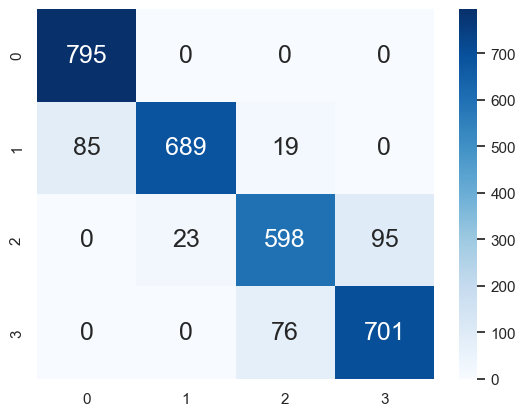

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
Gmodel=GaussianNB()
Gmodel.fit(x_train,y_train.ravel())
train_pred_gau=Gmodel.predict(x_train) #Predicting on training data
test_pred_gau=Gmodel.predict(x_test) #Predicting on Testing data

nb_test(Gmodel,x_train,y_train)
print("accuracy",accuracy_score(y_test, test_pred_gau))
print("Precision:", precision_score(y_test, test_pred_gau, average='macro'))
print("Recall:", recall_score(y_test, test_pred_gau, average='macro'))
print("F1 Score:", f1_score(y_test, test_pred_gau, average='macro'))
print("Cohen Kappa Score",cohen_kappa_score(y_test, test_pred_gau))
print(classification_report(y_test, test_pred_gau)) # Classification Report
cm=confusion_matrix(y_test,test_pred_gau)
print("\n Confusion Matrix: ")
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 18}, fmt='g') #Confusion Matrix

#Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [54]:
 # Model Accuracy, how often is the classifier correct?
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Performance function : takes y_test and y_pred arrays and prints classification report, confusion matrix
def performance(y_test,y_pred):
  print("accuracy",accuracy_score(y_test, y_pred))
  cm=confusion_matrix(y_test,y_pred)
  print(cm)
  print(classification_report(y_test, y_pred))
  from sklearn.metrics import cohen_kappa_score
  print("Cohen Kappa Score",cohen_kappa_score(y_test, y_pred))
performance(y_test, y_pred)

accuracy 0.9756572541382668
[[787   8   0   0]
 [ 30 760   3   0]
 [  0   8 698  10]
 [  0   0  16 761]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       795
           1       0.98      0.96      0.97       793
           2       0.97      0.97      0.97       716
           3       0.99      0.98      0.98       777

    accuracy                           0.98      3081
   macro avg       0.98      0.98      0.98      3081
weighted avg       0.98      0.98      0.98      3081

Cohen Kappa Score 0.9675239299762102


[]

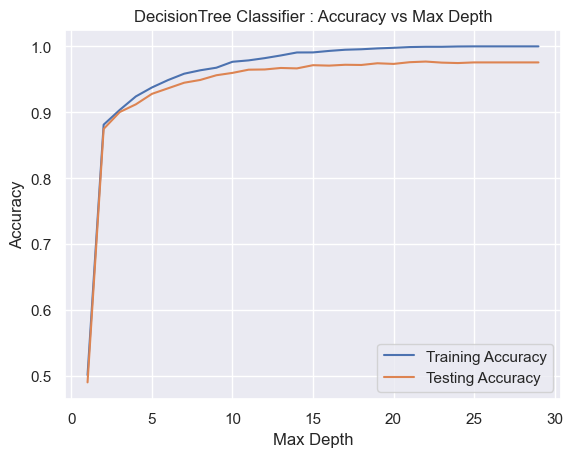

In [68]:
#Accuracy vs max-depth


rf_train_score=[]
rf_test_score=[]
for i in np.arange(1, 30):
  param_grid = {'criterion':['gini','entropy'],'max_depth': [i],'random_state':[2,3]}
  GS_RF=GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
  GS_RF.fit(x_train,y_train.ravel())
  y_train_pred=GS_RF.predict(x_train)
  rf_train_score.append(accuracy_score(y_train,y_train_pred))
  y_pred=GS_RF.predict(x_test)
  rf_test_score.append(accuracy_score(y_test,y_pred))
  # print(rf_train_score,rf_test_score)
 
plt.title("DecisionTree Classifier : Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1,30),rf_train_score,label="Training Accuracy")
plt.plot(np.arange(1,30),rf_test_score,label="Testing Accuracy")
plt.legend()
plt.plot()

#K-Nearest Neighbour(euclidean_distance (l2))

Minimum error: 0.016877637130801686 at K = 1
Maximum accuracy: 0.9831223628691983 at K = 1
Maximum precision score: 0.9831223628691983 at K = 1
Maximum recall score: 0.9831223628691983 at K = 1
Maximum f1 score: 0.9831223628691983 at K = 1
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       795
           1       0.97      0.98      0.98       793
           2       1.00      0.95      0.97       716
           3       0.98      1.00      0.99       777

    accuracy                           0.98      3081
   macro avg       0.98      0.98      0.98      3081
weighted avg       0.98      0.98      0.98      3081



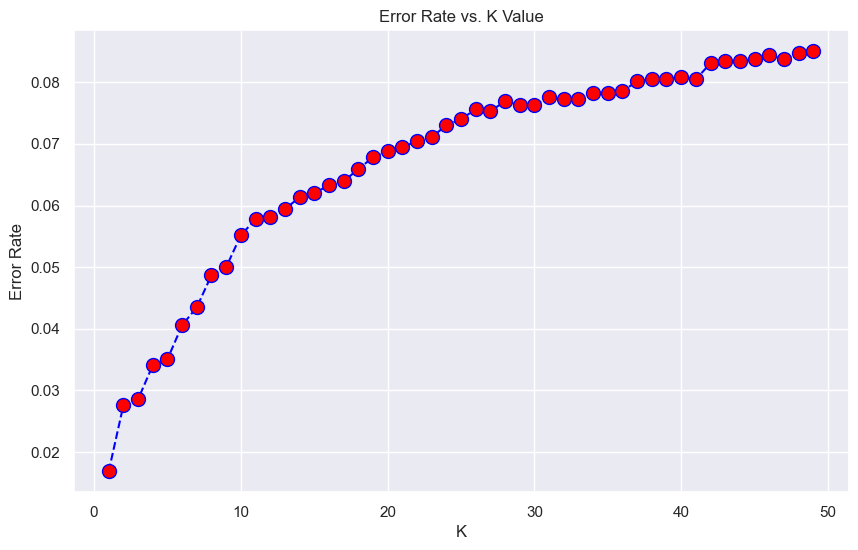

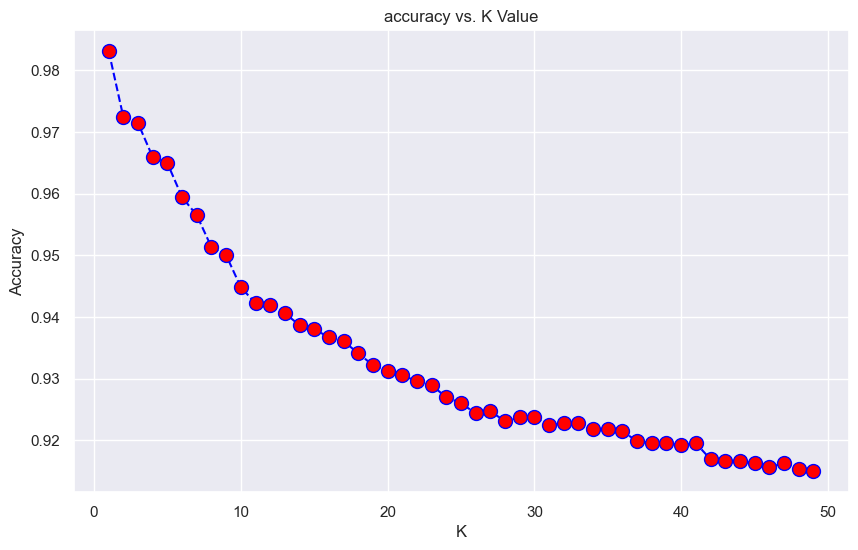

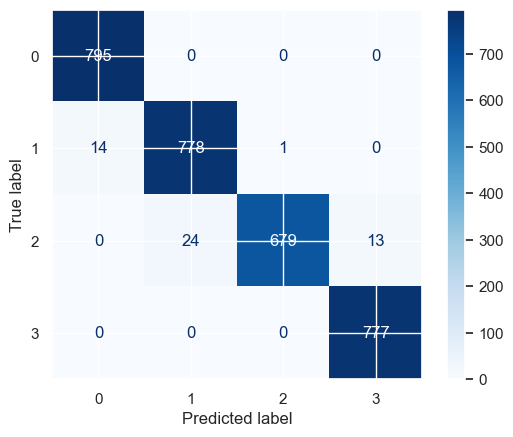

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pickle
error_rate = []
acc = []
ps=[]
rs=[]
fs=[]
for i in range(1,50):
 knn = KNeighborsClassifier(n_neighbors=i) #Power Parameter DEFAULT p=2
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))
 acc.append(accuracy_score(y_test, pred_i))#Storing the accuracy score in list
 ps.append(precision_score(y_test, pred_i, average='macro')) #Storing the precision score in list
 rs.append(recall_score(y_test, pred_i, average='macro')) #Storing recall score in list
 fs.append(f1_score(y_test, pred_i, average='macro')) #Storing f1 score in list
 file1 = open("KNN(E)", "wb") #Storing the weights of the model
 pickle.dump(knn, file1) #Model trained on grid search parameters
 file1.close()
 
#ERROR RATE vs K-VALUE
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

#ACCURACY vs K-VALUE
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
#We find the model with minimum error and maximum accuracy
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc))+1)
print("Maximum precision score:",max(acc),"at K =",ps.index(max(ps))+1)
print("Maximum recall score:",max(acc),"at K =",rs.index(max(rs))+1)
print("Maximum f1 score:",max(acc),"at K =",fs.index(max(fs))+1)


knn = KNeighborsClassifier(n_neighbors=acc.index(max(acc))+1) 
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
file1 = open("KNN(E)", "wb") #Storing the weights of the model
pickle.dump(knn, file1) #Model trained on grid search parameters
file1.close()
print(classification_report(y_test, pred))# Classification Report
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(knn,x_test,y_test,cmap=plt.cm.Blues)    #Confusion Matrix

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       795
           1       0.97      0.98      0.98       793
           2       1.00      0.95      0.97       716
           3       0.98      1.00      0.99       777

    accuracy                           0.98      3081
   macro avg       0.98      0.98      0.98      3081
weighted avg       0.98      0.98      0.98      3081



<AxesSubplot:>

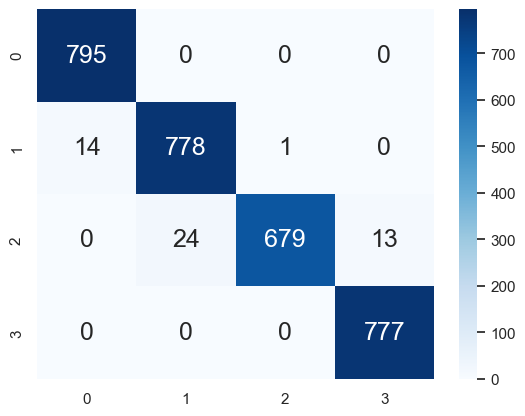

In [71]:

knn = KNeighborsClassifier(n_neighbors=acc.index(max(acc))+1) 
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print(classification_report(y_test, pred)) # Classification Report
comf=confusion_matrix(y_test, pred) #Confusion Matrix
sns.heatmap(comf, cmap="Blues", annot=True,annot_kws={"size": 18}, fmt='g')

#K-Nearest Neighbour(manhattan_distance (l1))

Minimum error: 0.018500486854917234 at K = 1
Maximum accuracy: 0.9814995131450828 at K = 1
Maximum precision score: 0.9814995131450828 at K = 1
Maximum recall score: 0.9814995131450828 at K = 1
Maximum f1 score: 0.9814995131450828 at K = 1


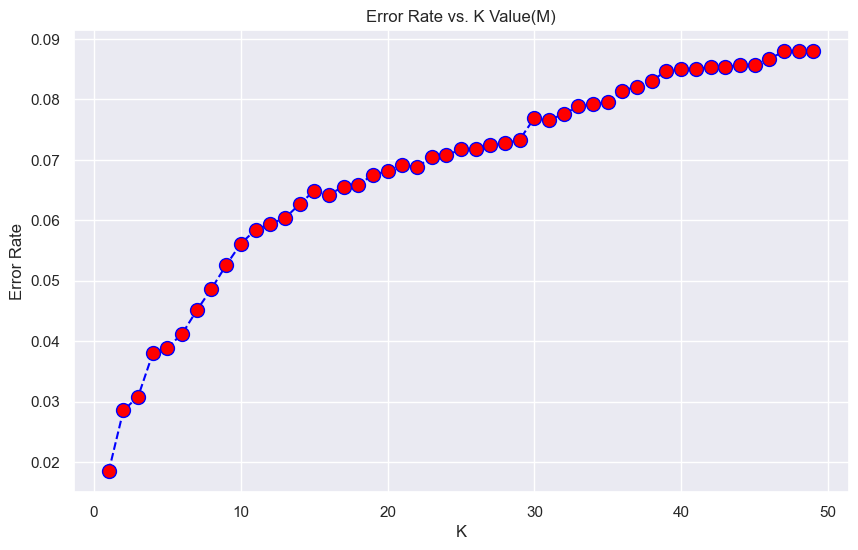

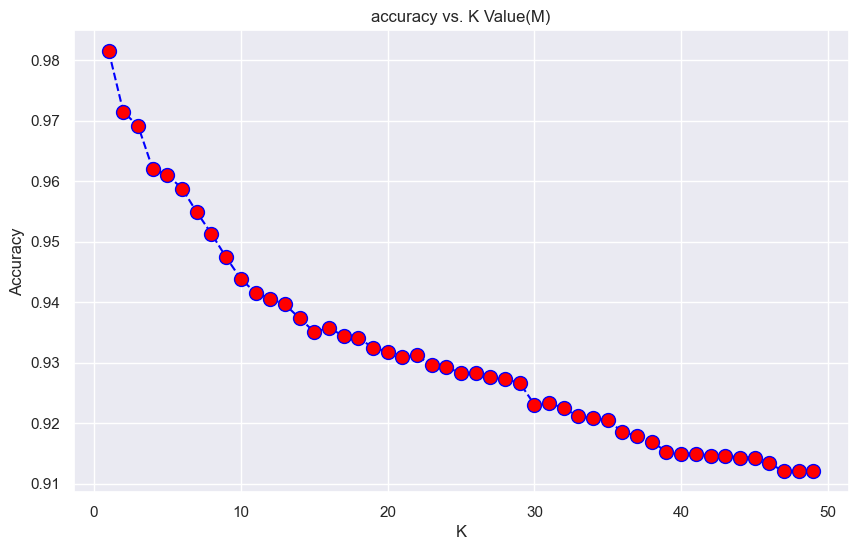

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pickle
error_rate = []
acc = []
ps=[]
rs=[]
fs=[]
for i in range(1,50):
 knn = KNeighborsClassifier(n_neighbors=i,p=1) #Power Parameter: manhattan_distance (l1)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))
 acc.append(accuracy_score(y_test, pred_i))#Storing the accuracy score in list
 ps.append(precision_score(y_test, pred_i, average='macro'))#Storing the precision score in list
 rs.append(recall_score(y_test, pred_i, average='macro'))#Storing recall score in list
 fs.append(f1_score(y_test, pred_i, average='macro')) #Storing f1 score in list
 file1 = open("KNN(M)", "wb") #Storing the weights of the model 
 pickle.dump(knn, file1) 
 file1.close()
 

 
#ERROR RATE vs K-VALUE
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value(M)')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

#ACCURACY vs K-VALUE
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value(M)')
plt.xlabel('K')
plt.ylabel('Accuracy')
#We find the model with minimum error and maximum accuracy
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc))+1)
print("Maximum precision score:",max(acc),"at K =",ps.index(max(ps))+1)
print("Maximum recall score:",max(acc),"at K =",rs.index(max(rs))+1)
print("Maximum f1 score:",max(acc),"at K =",fs.index(max(fs))+1)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       795
           1       0.96      0.98      0.97       793
           2       1.00      0.94      0.97       716
           3       0.98      1.00      0.99       777

    accuracy                           0.98      3081
   macro avg       0.98      0.98      0.98      3081
weighted avg       0.98      0.98      0.98      3081

AxesSubplot(0.125,0.11;0.62x0.77)


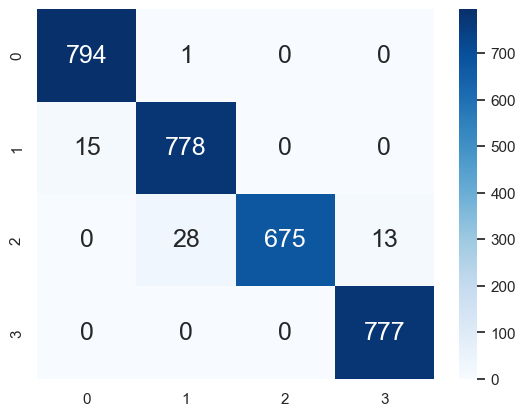

In [73]:
knn = KNeighborsClassifier(n_neighbors=acc.index(max(acc))+1,p=1) #We find the model with minimum error and maximum accuracy
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
import pickle
file1 = open("KNN(M)", "wb") #Storing the weights of the model
pickle.dump(knn, file1) 
file1.close()
print(classification_report(y_test, pred))# Classification Report
comf=confusion_matrix(y_test, pred)#Confusion Matrix
print(sns.heatmap(comf, cmap="Blues", annot=True,annot_kws={"size": 18}, fmt='g'))

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       795
           1       0.96      0.98      0.97       793
           2       1.00      0.94      0.97       716
           3       0.98      1.00      0.99       777

    accuracy                           0.98      3081
   macro avg       0.98      0.98      0.98      3081
weighted avg       0.98      0.98      0.98      3081



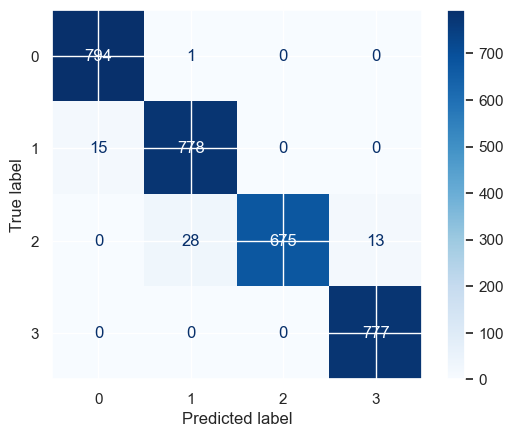

In [75]:
k=[]
for i in range(1,5):
  k.append(i)
#We use gridsearchCV to find the best possible paramters
param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':[30],'p':[1,2]}
knn = GridSearchCV(KNeighborsClassifier(), param_grid)
#knn = KNeighborsClassifier(n_neighbors=acc.index(max(acc))+1) 
knn.fit(x_train, y_train.ravel())#Model trained on grid search parameters
print(knn.best_params_)
pred = knn.predict(x_test)
print(classification_report(y_test, pred))# Classification Report
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(knn,x_test,y_test,cmap=plt.cm.Blues)#Confusion Matrix

# SVM


In [76]:


#importing necessary libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#Performance function : takes y_test and y_pred arrays and prints classification report, confusion matrix
def performance(y_test,y_pred):
  print("accuracy",accuracy_score(y_test, y_pred))
  cm=confusion_matrix(y_test,y_pred)
  print(cm)
  print(classification_report(y_test, y_pred))
  from sklearn.metrics import cohen_kappa_score
  print("Cohen Kappa Score",cohen_kappa_score(y_test, y_pred))


In [77]:
#Linear kernel SVM
from sklearn import svm
#Making pipeline
SVM_object = make_pipeline(svm.SVC(kernel='poly'))
#Fitting training data
SVM_object.fit(x_train,y_train)
y_pred=SVM_object.predict(x_test)
#Calling performance function
performance(y_test, y_pred)

accuracy 0.9470950989938332
[[795   0   0   0]
 [ 85 697  11   0]
 [  0  16 652  48]
 [  0   0   3 774]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       795
           1       0.98      0.88      0.93       793
           2       0.98      0.91      0.94       716
           3       0.94      1.00      0.97       777

    accuracy                           0.95      3081
   macro avg       0.95      0.95      0.95      3081
weighted avg       0.95      0.95      0.95      3081

Cohen Kappa Score 0.9293865496663246


<AxesSubplot:>

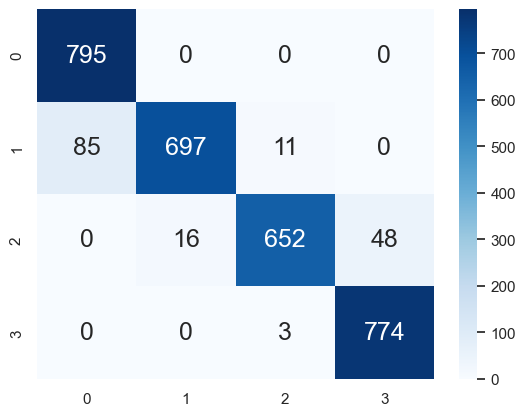

In [78]:
#Plotting using seaborn
import seaborn as sns
comf=confusion_matrix(y_test, y_pred)
sns.heatmap(comf, cmap="Blues", annot=True,annot_kws={"size": 18}, fmt='g')

In [79]:
#Best kernel Performance using Grid Search
param_grid = {'kernel':['linear','poly','sigmoid','rbf'],'gamma':['scale','auto'],'random_state':[1,2,3]}
GS_SVM=GridSearchCV(svm.SVC(), param_grid,cv=5)
GS_SVM.fit(x_train,y_train)
GS_SVM.best_params_

{'gamma': 'scale', 'kernel': 'poly', 'random_state': 1}

In [80]:
GS_SVM.score(x_test,y_test)

0.9470950989938332

In [81]:
#Error vs Kernel plot
dt_train_score=[]
dt_test_score=[]
for i in ['linear','poly','sigmoid','rbf']:
  param_grid = {'kernel':[i],'gamma':['scale','auto'],'random_state':[1,2,3]}
  GS_SVM=GridSearchCV(svm.SVC(), param_grid,cv=5)
  GS_SVM.fit(x_train,y_train)
  y_train_pred=GS_SVM.predict(x_train)
  y_pred=GS_SVM.predict(x_test)
  dt_train_score.append(accuracy_score(y_train,y_train_pred))
  dt_test_score.append(accuracy_score(y_test,y_pred))


[]

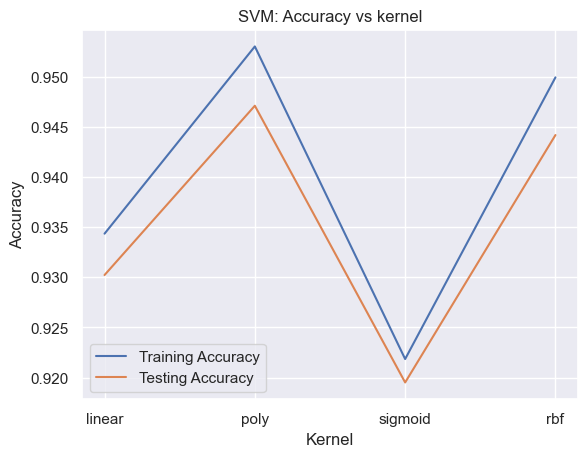

In [82]:
#Accuracy vs kernel
plt.title("SVM: Accuracy vs kernel")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.plot(['linear','poly','sigmoid','rbf'],dt_train_score,label="Training Accuracy")
plt.plot(['linear','poly','sigmoid','rbf'],dt_test_score,label="Testing Accuracy")
plt.legend()
plt.plot()

In [83]:
#Importing libraries for tsne plots
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_train) 
 


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12321 samples in 0.026s...
[t-SNE] Computed neighbors for 12321 samples in 1.183s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12321
[t-SNE] Computed conditional probabilities for sample 2000 / 12321
[t-SNE] Computed conditional probabilities for sample 3000 / 12321
[t-SNE] Computed conditional probabilities for sample 4000 / 12321
[t-SNE] Computed conditional probabilities for sample 5000 / 12321
[t-SNE] Computed conditional probabilities for sample 6000 / 12321
[t-SNE] Computed conditional probabilities for sample 7000 / 12321
[t-SNE] Computed conditional probabilities for sample 8000 / 12321
[t-SNE] Computed conditional probabilities for sample 9000 / 12321
[t-SNE] Computed conditional probabilities for sample 10000 / 12321
[t-SNE] Computed conditional probabilities for sample 11000 / 12321
[t-SNE] Computed conditional probabilities for sample 12000 / 12321
[t-SNE] Computed conditional probabilities for sam

[Text(0.5, 1.0, 'Stroke T-SNE projection')]

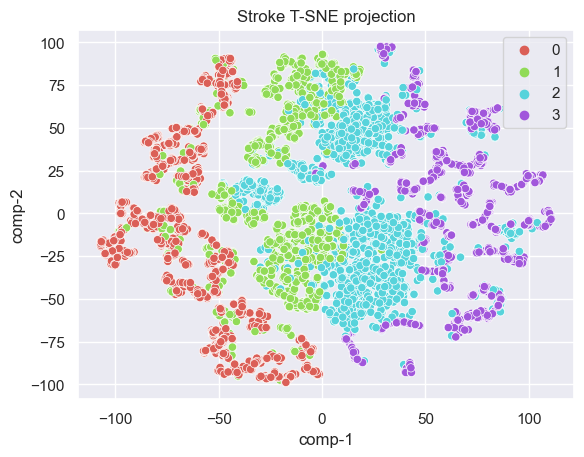

In [85]:
df1= pd.DataFrame()
df1["y"] = y_train
df1["comp-1"] = z[:,0]
df1["comp-2"] = z[:,1]

#some convert lists of lists to 2 dataframes (df_train_neg, df_train_pos) depending on the label - 

#plot the negative points and positive points
sns.scatterplot(x="comp-1", y="comp-2", hue=df1.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df1).set(title="Stroke T-SNE projection") 

In [86]:
#PCA transform. n_components = 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train)
x_pca = pca.transform(x_train)

In [87]:
x_pca

array([[-1.04619234, -0.66597603],
       [ 0.73736151, -0.33124251],
       [-1.32996046,  0.70444816],
       ...,
       [-0.26875244, -0.46647698],
       [-0.46632912,  0.89867641],
       [ 0.53844189, -0.35739938]])

In [88]:

#Code source: sklearn
#For plotting decision boundary and decision space of different SVM kernels
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = x_pca
y = y_train

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.SVC(kernel="sigmoid", C=C),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with sigmoid kernel",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)



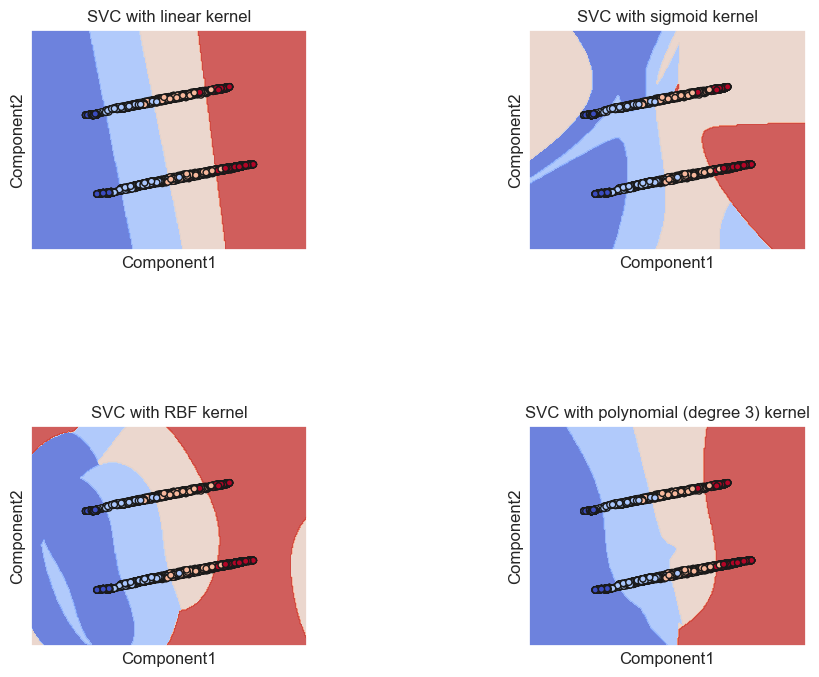

In [89]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)


for clf, title, ax in zip(models, titles, sub.flatten()):
 
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Component1")
    ax.set_ylabel("Component2")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Feature importance

Found above using RF classifier

NIHSS_Score    0.232721
tos            0.126347
bmi            0.126228
mRS            0.116398
glucose        0.097961
systolic       0.080692
paralysis      0.066406
cholestrol     0.059491
diastolic      0.044202
age            0.023455
smoking        0.021836
Male           0.002139
Female         0.002124

Text(0.5, 1.0, 'Feature importance')

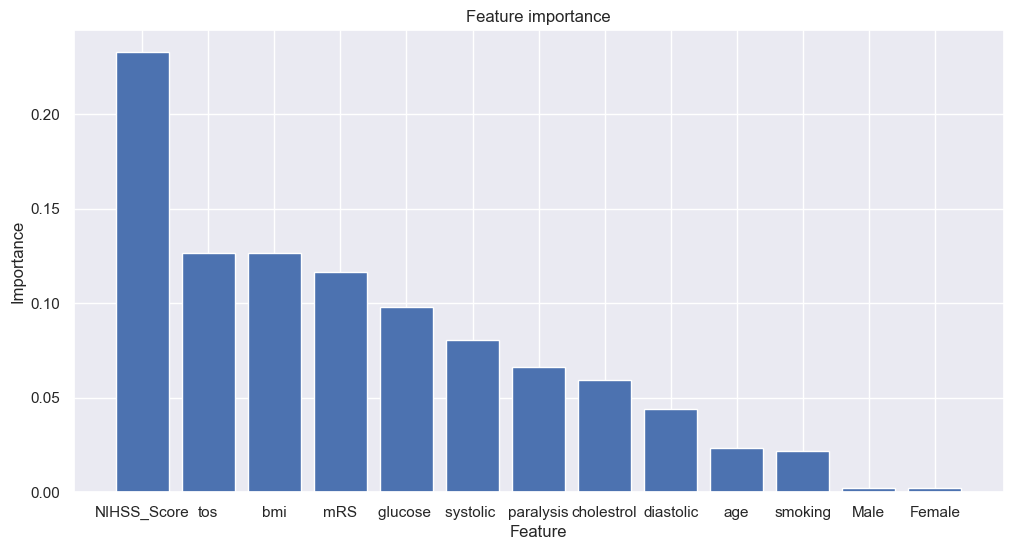

In [90]:
x = ["NIHSS_Score", "tos", "bmi", "mRS", "glucose ", "systolic ", "paralysis", "cholestrol", "diastolic", "age", "smoking", "Male" ,"Female"]
y = [0.232721, 0.126347, 0.126228, 0.116398, 0.097961, 0.080692, 0.066406, 0.059491 , 0.044202, 0.023455,0.021836,0.002139,0.002124]
plt.figure(figsize = (12,6))
plt.bar(x,y)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importance")